<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab: PieCharts**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [19]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/Capstone_edX/Module%204/master.db

--2021-04-22 03:06:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/Capstone_edX/Module%204/master.db
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8691712 (8.3M) [binary/octet-stream]
Saving to: ‘master.db.1’

master.db.1         100%[===================>]   8.29M  13.9MB/s    in 0.6s    

2021-04-22 03:06:43 (13.9 MB/s) - ‘master.db.1’ saved [8691712/8691712]



Connect to the database.


In [20]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('master.db')
cur = conn.cursor()
QUERY = "SELECT * FROM master"
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
print(df.head())

   Respondent  ... NormalizedAnnualCompensation
0           1  ...                        25000
1           2  ...                        58800
2           3  ...                       130000
3           4  ...                        58000
4           5  ...                       550000

[5 rows x 49 columns]


Import pandas module.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Demo: How to run an sql query


In [22]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df1 = pd.read_sql_query(QUERY,conn)
df1.head()

,COUNT(*)
0,4387


## Demo: How to list all tables


In [23]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,MASTER


## Demo: How to run a group by query


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


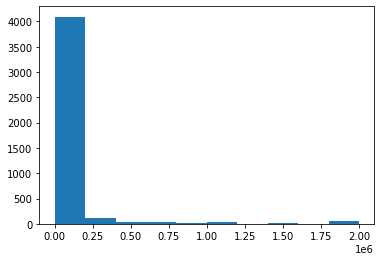

In [24]:
# your code goes here
plt.hist(df['ConvertedComp'])
plt.show()

### Box Plots


Plot a box plot of `Age.`


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



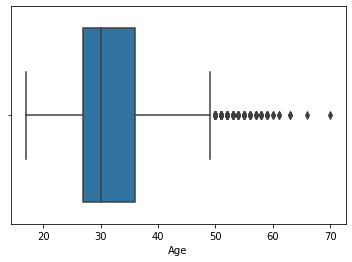

In [25]:
# your code goes here
import seaborn as sns
sns.boxplot(df['Age'])
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


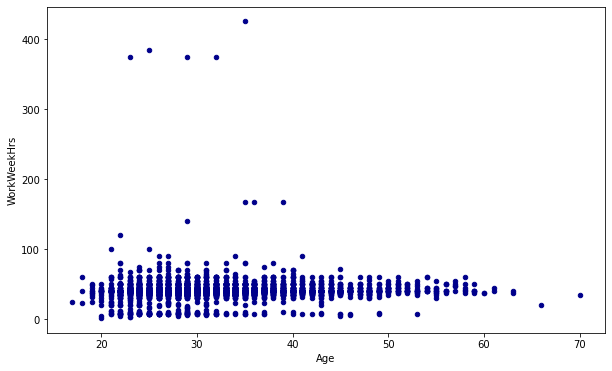

In [26]:
# your code goes here
df.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `Age`, use `Age` column as bubble size.

##### Hint: Use plotly.express to create a bubble chart


In [27]:
# your code goes here
import plotly.express as px
fig = px.scatter(df, x="WorkWeekHrs", y="Age",
         size="Age", log_x=True, size_max=10)
fig.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 Country that respondents filled the survey . Display percentages of each database on the pie chart. 


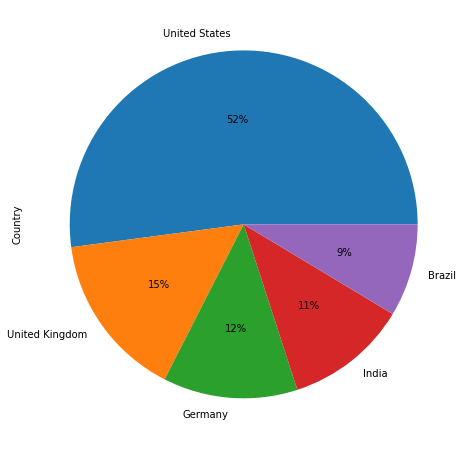

In [28]:
# your code goes here
df_pie = df['Country'].value_counts()
df_pie=df_pie.head(5)
df_pie.plot(kind='pie', figsize=(8,8), autopct='%1.0f%%')
plt.show()

## Visualizing comparison of data


### Line Chart


Draw distribution plot for ConverteComp and plot the median

##### Hint: Use seaborn library for distribution plot


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



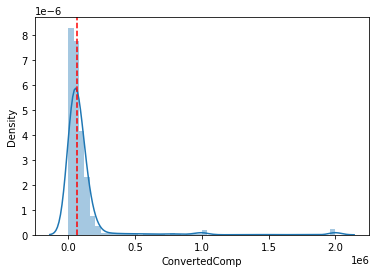

In [29]:
# your code goes here
import seaborn as sns
median=df['ConvertedComp'].median()
sns.distplot(df["ConvertedComp"])
plt.axvline(median, color='r', linestyle='--')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


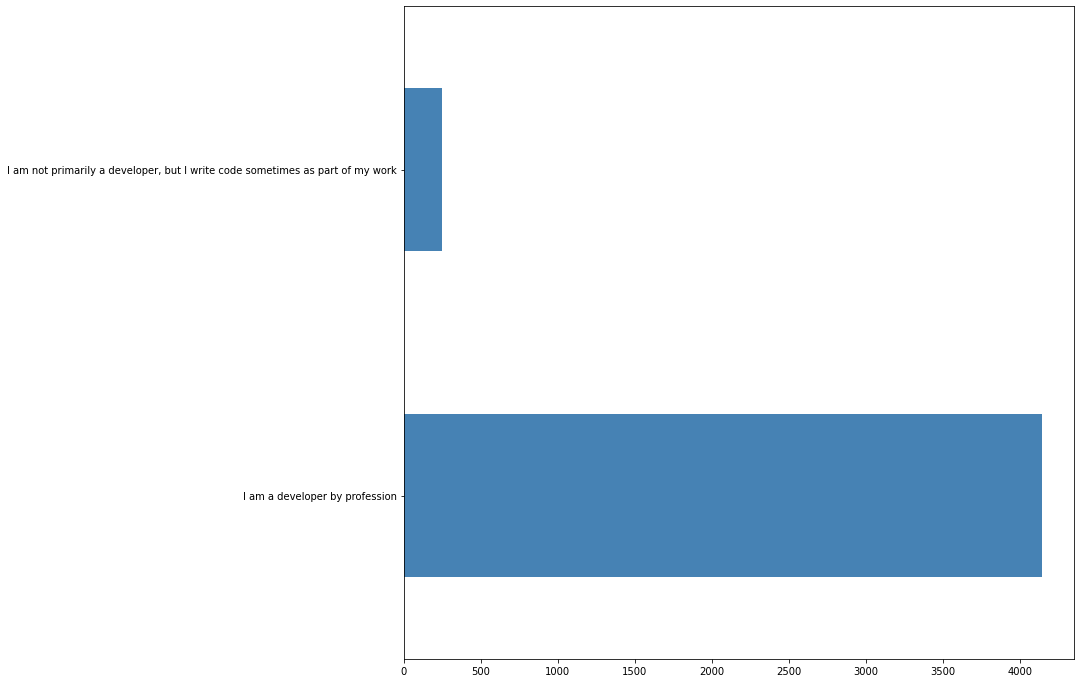

In [30]:
# your code goes here
df_mbranch = df['MainBranch'].value_counts()
df_mbranch
df_mbranch.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.show()

Close the database connection.


In [31]:
conn.close()